In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import HistGradientBoostingRegressor
import xgboost as xgb

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xf. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.

# Read, pre-process and visualize data

In [2]:
data_set = pd.read_csv('Index closing price from 1994 to 2021.csv')
data_set.head()

,Date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,"2,224.95","3,446.00","18,124.01"
1,1994-01-10,475.27,"2,225.00","3,440.60","18,443.44"
2,1994-01-11,474.13,"2,228.10","3,413.80","18,485.25"
3,1994-01-12,474.17,"2,182.06","3,372.00","18,793.88"
4,1994-01-13,472.47,"2,142.37","3,360.00","18,577.26"


In [3]:
len(data_set)
data_set.isna().sum()
data_set.dtypes

7255

Date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

Date       object
spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object

In [4]:
data_set.columns

# Step 1: Ensure the 'Date' column is in datetime format
data_set['Date'] = pd.to_datetime(data_set['Date'])

# Step 2: Convert datetime to integer timestamp (in seconds)
data_set['Date'] = data_set['Date'].astype(np.int64) // 10**9

data_set.tail()

Index(['Date', 'spx', 'dax', 'ftse', 'nikkei'], dtype='object')

,Date,spx,dax,ftse,nikkei
7250,1634860800,"4,544.90","15,542.98","7,204.60","28,804.85"
7251,1635120000,"4,566.48","15,599.23","7,222.80","28,600.41"
7252,1635206400,"4,574.79","15,757.06","7,277.60","29,106.01"
7253,1635292800,"4,551.68","15,705.81","7,253.30","29,098.24"
7254,1635379200,"4,596.42","15,696.33","7,249.50","28,820.09"


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data_set.drop(columns = ['spx']), data_set['spx'], test_size=0.2, random_state=50)
X_train
X_test
y_train
y_test

,Date,dax,ftse,nikkei
2168,1020211200,"5,041.20","5,125.50","11,552.79"
403,806716800,"2,237.73","3,454.30","16,387.25"
5835,1463702400,"9,916.02","6,156.30","16,736.35"
100,769996800,"2,112.80","2,966.40","20,777.16"
1452,933638400,"5,107.68","6,250.70","17,969.93"
...,...,...,...,...
2014,1001548800,"4,184.50","4,763.60","9,696.53"
6253,1514332800,"13,070.02","7,620.70","22,911.21"
1931,991612800,"6,177.74","5,856.50","13,312.35"
5600,1435276800,"11,492.43","6,753.70","20,706.15"


,Date,dax,ftse,nikkei
7067,1612828800,"14,011.80","6,531.60","29,505.93"
6311,1521417600,"12,217.02","7,042.90","21,480.90"
5469,1419465600,"9,922.11","6,598.20","17,808.75"
809,855792000,"3,256.86","4,327.10","18,688.06"
6801,1580688000,"13,045.19","7,326.30","22,971.94"
...,...,...,...,...
4113,1255478400,"5,854.14","5,256.10","10,060.21"
73,766800000,"2,194.09","3,098.30","19,882.18"
4751,1332720000,"7,079.23","5,902.70","10,018.24"
810,855878400,"3,249.17","4,341.00","18,722.00"


2168   1,086.46
403      561.61
5835   2,052.32
100      457.33
1452   1,322.18
         ...   
2014   1,018.61
6253   2,682.62
1931   1,267.11
5600   2,101.49
5808   2,082.42
Name: spx, Length: 5804, dtype: float64

7067   3,911.23
6311   2,712.92
5469   2,081.88
809      811.82
6801   3,248.92
         ...   
4113   1,092.02
73       441.96
4751   1,416.51
810      808.48
1438   1,398.17
Name: spx, Length: 1451, dtype: float64

# Decison tree


In [6]:
clf = DecisionTreeRegressor(random_state=50)

clf = clf.fit(X_train, y_train) 

In [7]:
X_train.columns
clf.feature_importances_

Index(['Date', 'dax', 'ftse', 'nikkei'], dtype='object')

array([0.90296518, 0.02037842, 0.07141801, 0.00523839])

In [8]:
test_output = pd.DataFrame(clf.predict(X_test), index = X_test.index, columns = ['pred_spx'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx'] - test_output['spx']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
abs(test_output['pred_spx'] - test_output['spx']).mean()/test_output['spx'].mean()

,pred_spx,spx
7067,"3,909.88","3,911.23"
6311,"2,716.94","2,712.92"
5469,"2,081.88","2,081.88"
809,808.48,811.82
6801,"3,283.66","3,248.92"


Mean absolute error is 
13.274364468806288


0.008531494740122672

## Bagging Regressor ## 

In [9]:
regr = BaggingRegressor(random_state=50, n_estimators = 200, max_samples = 1000)

regr = regr.fit(X_train, y_train) 

In [10]:
test_output = pd.DataFrame(regr.predict(X_test), index = X_test.index, columns = ['pred_spx'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx'] - test_output['spx']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
abs(test_output['pred_spx'] - test_output['spx']).mean()/test_output['spx'].mean()

,pred_spx,spx
7067,"3,891.66","3,911.23"
6311,"2,684.52","2,712.92"
5469,"2,057.77","2,081.88"
809,796.06,811.82
6801,"3,167.27","3,248.92"


Mean absolute error is 
13.935072274605693


0.008956134667946088

## Random Forest Regressor 

In [11]:
rf = RandomForestRegressor(random_state=50, min_samples_leaf = 3, max_features = "sqrt")

rf = rf.fit(X_train, y_train) 


In [12]:
X_train.columns
rf.feature_importances_

Index(['Date', 'dax', 'ftse', 'nikkei'], dtype='object')

array([0.49274835, 0.33154718, 0.09493938, 0.08076508])

In [13]:
test_output = pd.DataFrame(rf.predict(X_test), index = X_test.index, columns = ['pred_spx'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx'] - test_output['spx']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
abs(test_output['pred_spx'] - test_output['spx']).mean()/test_output['spx'].mean()

,pred_spx,spx
7067,"3,906.18","3,911.23"
6311,"2,673.19","2,712.92"
5469,"2,077.27","2,081.88"
809,803.31,811.82
6801,"3,157.23","3,248.92"


Mean absolute error is 
11.638673205425468


0.007480228486074053

## Gradeint Boosting Regressor

In [14]:
gb = GradientBoostingRegressor(random_state=50, min_samples_leaf = 2, max_depth = 4)

gb = gb.fit(X_train, y_train) 


In [15]:
X_train.columns
gb.feature_importances_

Index(['Date', 'dax', 'ftse', 'nikkei'], dtype='object')

array([0.76231103, 0.14441738, 0.07881607, 0.01445553])

In [16]:
test_output = pd.DataFrame(gb.predict(X_test), index = X_test.index, columns = ['pred_spx'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx'] - test_output['spx']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
abs(test_output['pred_spx'] - test_output['spx']).mean()/test_output['spx'].mean()

,pred_spx,spx
7067,"3,899.49","3,911.23"
6311,"2,670.22","2,712.92"
5469,"2,040.23","2,081.88"
809,781.47,811.82
6801,"3,179.43","3,248.92"


Mean absolute error is 
16.424064696064132


0.010555821477945771

## XGBoost Regressor 

In [17]:
# XGBoost comes with its own class for storing datasets called DMatrix. 
# It is a highly optimized class for memory and speed. 
# That's why converting datasets into this format is a requirement for the native XGBoost API:


# Create regression matrices

dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)

dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [18]:
params = {"objective": "reg:squarederror", "tree_method": "exact", "max_depth" : 4, "learning_rate" : 0.1} # use "tree_method" : "hist" if you need speed

In [19]:
n = 100

model = xgb.train(

   params=params,

   dtrain=dtrain_reg,

   num_boost_round=n,

)

In [20]:
from sklearn.metrics import mean_squared_error
preds = model.predict(dtest_reg)


In [21]:
test_output = pd.DataFrame(preds, index = X_test.index, columns = ['pred_spx'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx'] - test_output['spx']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
abs(test_output['pred_spx'] - test_output['spx']).mean()/test_output['spx'].mean()

,pred_spx,spx
7067,"3,900.28","3,911.23"
6311,"2,668.81","2,712.92"
5469,"2,041.44","2,081.88"
809,781.48,811.82
6801,"3,198.90","3,248.92"


Mean absolute error is 
16.462617018401904


0.010580599231789816

## Hybrid Model 

In [22]:
model = LinearRegression(fit_intercept = True)
model.fit(X_train, y_train) 

# The following gives the R-square score
model.score(X_train, y_train) 

LinearRegression()

0.9322488602434547

In [23]:
training_residuals = y_train - model.predict(X_train)

In [24]:
rf = RandomForestRegressor(random_state=50, min_samples_leaf = 3, max_features = "sqrt")

rf = rf.fit(X_train, training_residuals) 

In [25]:
pred_residuals = rf.predict(X_test)
y_pred = pred_residuals + model.predict(X_test)

In [26]:
test_output = pd.DataFrame(y_pred, index = X_test.index, columns = ['pred_spx'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx'] - test_output['spx']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
abs(test_output['pred_spx'] - test_output['spx']).mean()/test_output['spx'].mean()

,pred_spx,spx
7067,"3,910.61","3,911.23"
6311,"2,698.95","2,712.92"
5469,"2,081.00","2,081.88"
809,805.92,811.82
6801,"3,205.60","3,248.92"


Mean absolute error is 
12.394551857975575


0.007966035152265596

## Plotting a Graph for Comparing Results


<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Comparison of Mean Absolute Error (MAE) Across Models')

Text(0.5, 0, 'Models')

Text(0, 0.5, 'MAE (lower is better)')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.0, 13.77, '13.27')

Text(1.0, 14.43, '13.93')

Text(2.0, 12.13, '11.63')

Text(3.0, 16.92, '16.42')

Text(4.0, 16.96, '16.46')

Text(5.0, 12.89, '12.39')

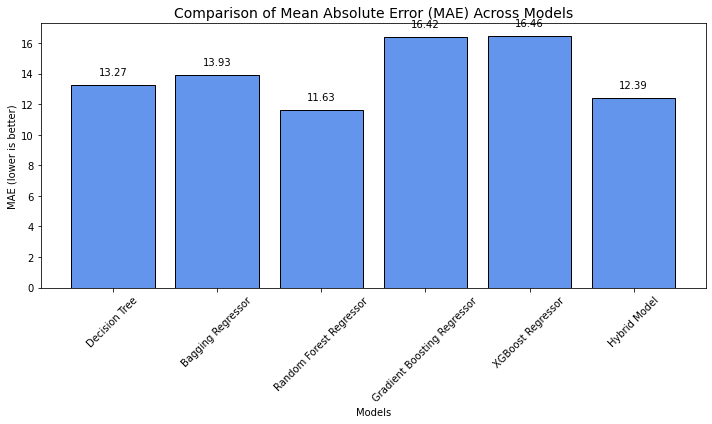

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Replace these with actual MAE or R² scores from your runs
model_names = [
    "Decision Tree", 
    "Bagging Regressor", 
    "Random Forest Regressor", 
    "Gradient Boosting Regressor",
    "XGBoost Regressor",
    "Hybrid Model"
]

# Example scores — update with your real MAEs or R² values
model_scores = [
    13.27,   # Decision Tree
    13.93,   # Bagging Regressor
    11.63,   # Random Forest Regressor
    16.42,   # Gradient Boosting Regressor
    16.46,   # XGBoost Regressor
    12.39,   # Hybrid Model
]

# Create DataFrame
df = pd.DataFrame({'Model': model_names, 'MAE': model_scores})

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Model'], df['MAE'], color='cornflowerblue', edgecolor='black')
plt.title('Comparison of Mean Absolute Error (MAE) Across Models', fontsize=14)
plt.xlabel('Models')
plt.ylabel('MAE (lower is better)')
plt.xticks(rotation=45)

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Plotting a Graph using MAPE

<Figure size 720x432 with 0 Axes>

Text(0.0, 1.1531494740122672, '0.85%')

Text(1.0, 1.1956134667946088, '0.90%')

Text(2.0, 1.0480228486074052, '0.75%')

Text(3.0, 1.355582147794577, '1.06%')

Text(4.0, 1.3580599231789816, '1.06%')

Text(5.0, 1.0966035152265596, '0.80%')

Text(0.5, 1.0, 'Comparison of MAPE Across Models')

Text(0, 0.5, 'MAPE (%)')

Text(0.5, 0, 'Machine Learning Models')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(0.0, 6.058059923178981)

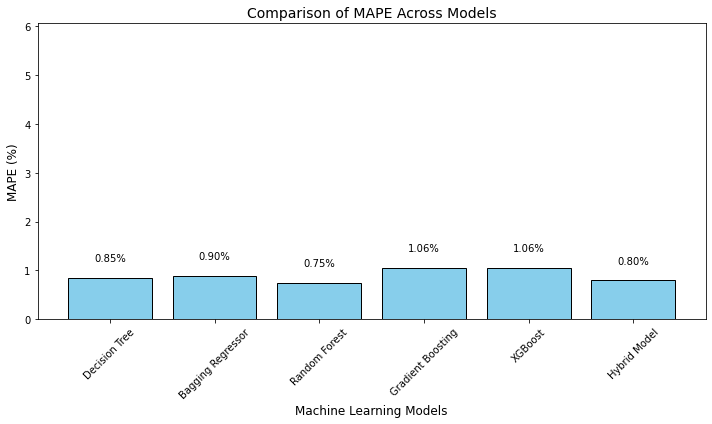

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Replace with your actual model names and MAPE values
model_names = [
    "Decision Tree",
    "Bagging Regressor",
    "Random Forest",
    "Gradient Boosting",
    "XGBoost",
    "Hybrid Model"
]

mape_scores = [
    0.008531494740122672,
    0.008956134667946088,
    0.007480228486074053,
    0.010555821477945771,
    0.010580599231789816,
    0.007966035152265596
]

# 2. Create a DataFrame
df = pd.DataFrame({
    "Model": model_names,
    "MAPE": [score * 100 for score in mape_scores]  # convert to %
})

# 3. Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(df["Model"], df["MAPE"], color='skyblue', edgecolor='black')

# 4. Annotate each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.3, f"{yval:.2f}%", ha='center', va='bottom')

plt.title("Comparison of MAPE Across Models", fontsize=14)
plt.ylabel("MAPE (%)", fontsize=12)
plt.xlabel("Machine Learning Models", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, max(df["MAPE"]) + 5)
plt.tight_layout()
plt.show()
